In [48]:
from keras import applications
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import regularizers
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import layer_utils, np_utils
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras import backend as K
from sklearn.manifold import TSNE
from matplotlib.pyplot import *
import matplotlib

In [34]:
train_dir = "D:/retinal_samples/basian_opt_testing/new_new_train/augmented_224/train"
validation_dir = "D:/retinal_samples/basian_opt_testing/new_valid"

image_width = 224
image_height = 224
batch_size = 16

vgg_16_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

In [42]:
vgg_16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [35]:
def dataGen():
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_width, image_height),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
            validation_dir,
            target_size=(image_width, image_height),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False)
    
    return train_generator, validation_generator

In [36]:
def getModel(layer_name):
    model = Model(vgg_16_model.input, vgg_16_model.get_layer(layer_name).output)
    
    return model

In [37]:
def generateBottleneckfeatures(model, generator):
    bottleneck_features = model.predict_generator(generator, nb_train_samples // batch_size)
    #np.save(open('D:/retinal_data_set_visioncare/visualization_features/vgg16/bottle_neck_features/bottleneck_features_train_block5.npy', 'wb'), bottleneck_features_train)
    nsamples, nx, ny, nd = bottleneck_features.shape
    reshaped_bottleneck_features = bottleneck_features.reshape((nsamples,nx*ny*nd))
    
    return reshaped_bottleneck_features

In [49]:
def plotBottleneckFeatures(bottleneck_features, train_labels):
    X_embedded = TSNE(n_components=2, perplexity=40, init='pca', n_iter=2500, verbose=2).fit_transform(bottleneck_features)
    colors = ['red','green','blue','purple', 'orange']
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=False)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=train_labels, cmap=matplotlib.colors.ListedColormap(colors), marker=".")

In [39]:
# load the bottleneck features saved earlier
#bottleneck_features = np.load(open('D:/retinal_data_set_visioncare/visualization_features/vgg16/bottle_neck_features/bottleneck_features_train_block5.npy', 'rb'))

In [47]:
train_labels

array([0, 0, 0, ..., 4, 4, 4])

In [40]:
train_generator, validation_generator = dataGen()

nb_train_samples = len(train_generator.filenames)  
num_classes = len(train_generator.class_indices)
# get the class lebels for the training data, in the original order  
train_labels = train_generator.classes

Found 2000 images belonging to 5 classes.
Found 113 images belonging to 5 classes.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 2.666s...
[t-SNE] Computed neighbors for 2000 samples in 185.726s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 6.354368
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 69.4380722, gradient norm = 0.1321608 (50 iterations in 2.523s)
[t-SNE] Iteration 100: error = 69.0998459, gradient norm = 0.0967579 (50 iterations in 2.723s)
[t-SNE] Iteration 150: error = 72.7829132, gradient norm = 0.0738513 (50 iterations in 2.662s)
[t-SNE] Iteration 200: error = 72.9584045, gradient norm = 0.0489552 (50 iterations in 2.447s)
[t-SNE] Iteration 250: error = 72.9720001, gradient norm = 0.0513871 (50 iterations in 2.406s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.972000
[t-SNE] Iteration 300: error = 1.9201351, gradient norm = 0.0013856 (50 iterations in 2.58

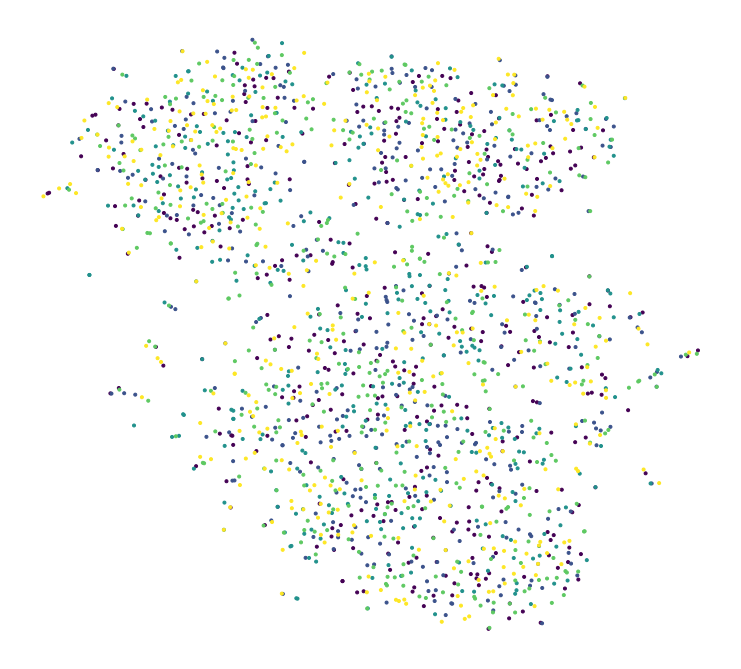

In [41]:
intermediate_model = getModel('block5_pool')
bottleneck_features = generateBottleneckfeatures(intermediate_model, train_generator)
plotBottleneckFeatures(bottleneck_features, train_labels)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 16.344s...
[t-SNE] Computed neighbors for 2000 samples in 791.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 81.469583
[t-SNE] Computed conditional probabilities in 0.846s
[t-SNE] Iteration 50: error = 75.8938141, gradient norm = 0.0486842 (50 iterations in 3.176s)
[t-SNE] Iteration 100: error = 83.7551041, gradient norm = 0.0633348 (50 iterations in 2.668s)
[t-SNE] Iteration 150: error = 82.6108627, gradient norm = 0.0664074 (50 iterations in 2.542s)
[t-SNE] Iteration 200: error = 84.2131958, gradient norm = 0.0566427 (50 iterations in 2.646s)
[t-SNE] Iteration 250: error = 82.6111145, gradient norm = 0.0670820 (50 iterations in 2.376s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.611115
[t-SNE] Iteration 300: error = 2.1638908, gradient norm = 0.0012388 (50 iterations in 2.

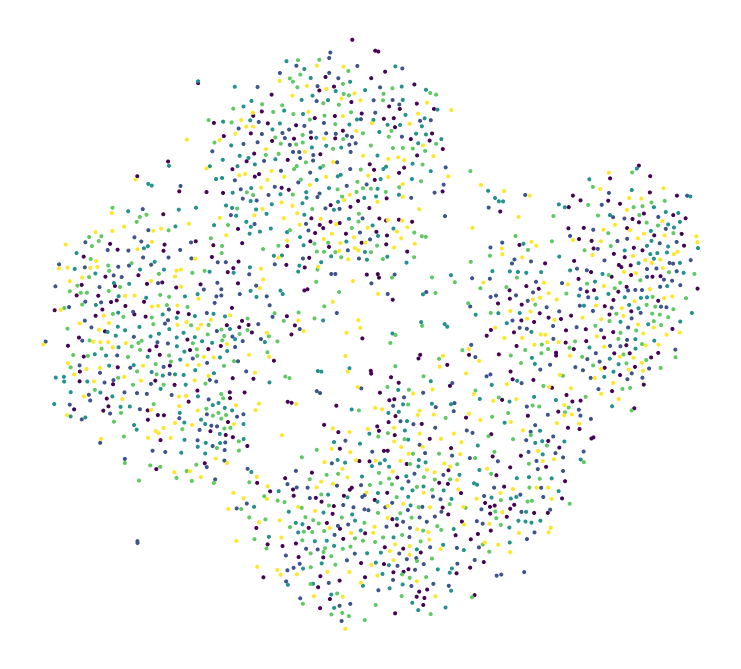

In [43]:
intermediate_model_1 = getModel('block4_pool')
bottleneck_features_1 = generateBottleneckfeatures(intermediate_model_1, train_generator)
plotBottleneckFeatures(bottleneck_features_1, train_labels)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 2.612s...
[t-SNE] Computed neighbors for 2000 samples in 184.923s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 6.354368
[t-SNE] Computed conditional probabilities in 0.141s
[t-SNE] Iteration 50: error = 69.5910721, gradient norm = 0.1252011 (50 iterations in 2.650s)
[t-SNE] Iteration 100: error = 68.9608078, gradient norm = 0.0908489 (50 iterations in 2.790s)
[t-SNE] Iteration 150: error = 72.8241043, gradient norm = 0.0713942 (50 iterations in 2.931s)
[t-SNE] Iteration 200: error = 73.0401382, gradient norm = 0.0539101 (50 iterations in 2.529s)
[t-SNE] Iteration 250: error = 72.9683838, gradient norm = 0.0479337 (50 iterations in 2.496s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.968384
[t-SNE] Iteration 300: error = 1.8840563, gradient norm = 0.0013012 (50 iterations in 2.58

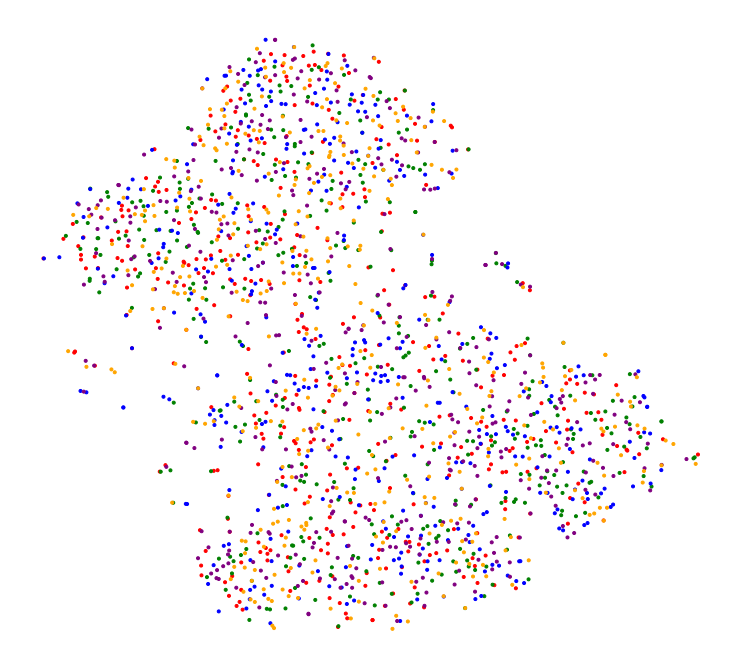

In [50]:
plotBottleneckFeatures(bottleneck_features, train_labels)